## Import Real and Synthetic Datasets

In [1]:
import pandas as pd

In [2]:
# Specify the path to the Real Data (RD) file
RD_path = '../data/real_data/test_dataset.csv'
# Specify the path to the Real Data (RD) file
SD_path = '../data/synthetic_data/test_dataset_synthetic_HMA.csv'

# Load the CSV file into a DataFrame
RD = pd.read_csv(RD_path)
SD = pd.read_csv(SD_path)

In [3]:
# RD

In [4]:
# SD

## Statistic Evaluation

### Duration

In [5]:
average_duration_rd = RD['Duration'].mean()
average_duration_sd = SD['Duration'].mean()
print(f"Average Duration - RD: {average_duration_rd:.2f}")
print(f"Average Duration - SD: {average_duration_sd:.2f}")

Average Duration - RD: 13.73
Average Duration - SD: 15.98


### Gender

In [6]:
# Calculate and display the percentages of rows for each unique value in the 'Gender' column in the real data
total_rows_rd = len(RD)
value_counts_rd = RD['Gender'].value_counts()
percentages_rd = (value_counts_rd / total_rows_rd) * 100
print("REAL DATA:")
for value, count in value_counts_rd.items():
    percentage = percentages_rd[value]
    print(f"{value}: {percentage:.2f}%")

# Calculate and display the percentages of rows for each unique value in the 'Gender' column in the synthetic data
total_rows_sd = len(SD)
value_counts_sd = SD['Gender'].value_counts()
percentages_sd = (value_counts_sd / total_rows_sd) * 100
print("\nSYNTHETIC DATA:")
for value, count in value_counts_sd.items():
    percentage = percentages_sd[value]
    print(f"{value}: {percentage:.2f}%")

REAL DATA:
M: 50.07%
F: 49.94%

SYNTHETIC DATA:
F: 50.15%
M: 49.85%


### Age Range

In [7]:
# Calculate and display the percentages of rows for each unique value in the 'Age Range' column in the real data
total_rows_rd = len(RD)
value_counts_rd = RD['Age Range'].value_counts()
percentages_rd = (value_counts_rd / total_rows_rd) * 100

print("REAL DATA:")
for value in sorted(value_counts_rd.index, reverse=True):
    count = value_counts_rd[value]
    percentage = percentages_rd[value]
    print(f"{value}: {percentage:.2f}%")

# Calculate and display the percentages of rows for each unique value in the 'Age Range' column in the synthetic data
total_rows_sd = len(SD)
value_counts_sd = SD['Age Range'].value_counts()
percentages_sd = (value_counts_sd / total_rows_sd) * 100

print("\nSYNTHETIC DATA:")
for value in sorted(value_counts_sd.index, reverse=True):
    count = value_counts_sd[value]
    percentage = percentages_sd[value]
    print(f"{value}: {percentage:.2f}%")

REAL DATA:
65: 33.38%
55: 22.20%
45: 22.05%
35: 11.31%
25: 11.07%

SYNTHETIC DATA:
65: 18.04%
55: 18.98%
45: 24.31%
35: 17.93%
25: 20.74%


### Region

In [8]:
# Calculate and display the percentages of rows for each unique value in the 'Region' column in the real data
total_rows_rd = len(RD)
value_counts_rd = RD['Region'].value_counts()
percentages_rd = (value_counts_rd / total_rows_rd) * 100
print("REAL DATA:")
for value in sorted(value_counts_rd.index):
    count = value_counts_rd[value]
    percentage = percentages_rd[value]
    print(f"{value}: {percentage:.2f}%")

# Calculate and display the percentages of rows for each unique value in the 'Region' column in the synthetic data
total_rows_sd = len(SD)
value_counts_sd = SD['Region'].value_counts()
percentages_sd = (value_counts_sd / total_rows_sd) * 100
print("\nSYNTHETIC DATA:")
for value in sorted(value_counts_sd.index):
    count = value_counts_sd[value]
    percentage = percentages_sd[value]
    print(f"{value}: {percentage:.2f}%")

REAL DATA:
Lombardia: 37.45%
Sicilia: 12.66%
Toscana: 12.41%
Trentino: 12.39%
Veneto: 25.09%

SYNTHETIC DATA:
Lombardia: 32.92%
Sicilia: 15.09%
Toscana: 11.21%
Trentino: 18.38%
Veneto: 22.40%


## Dependencies Verification

Artificially introduced dependencies are present in RD, let's examine whether these dependencies are maintained in SD.

### Duration Distribution

In [9]:
import matplotlib.pyplot as plt
import numpy as np

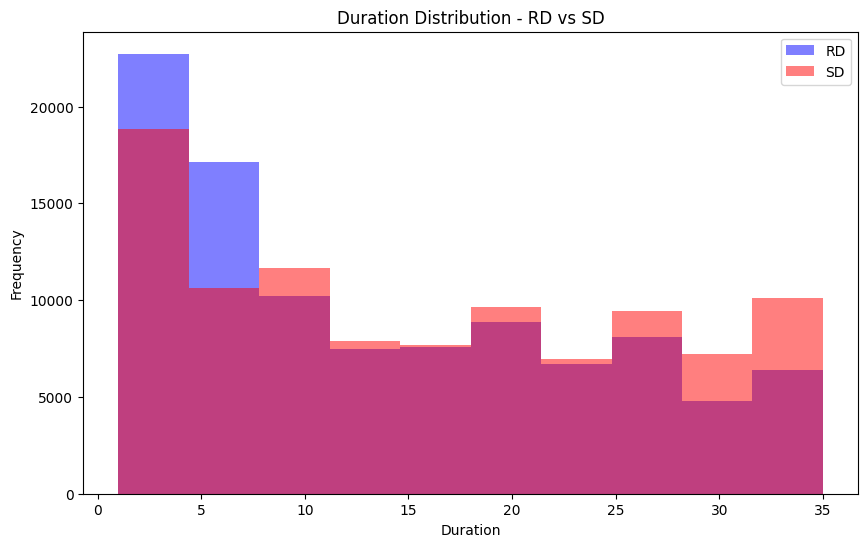

In [10]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of duration for RD and SD
ax.hist(RD['Duration'], bins=10, color='blue', alpha=0.5, label='RD')
ax.hist(SD['Duration'], bins=10, color='red', alpha=0.5, label='SD')

# Set labels and title
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Duration Distribution - RD vs SD')

# Add legend
ax.legend()

# Show the plot
plt.show()


### Gender VS Income 

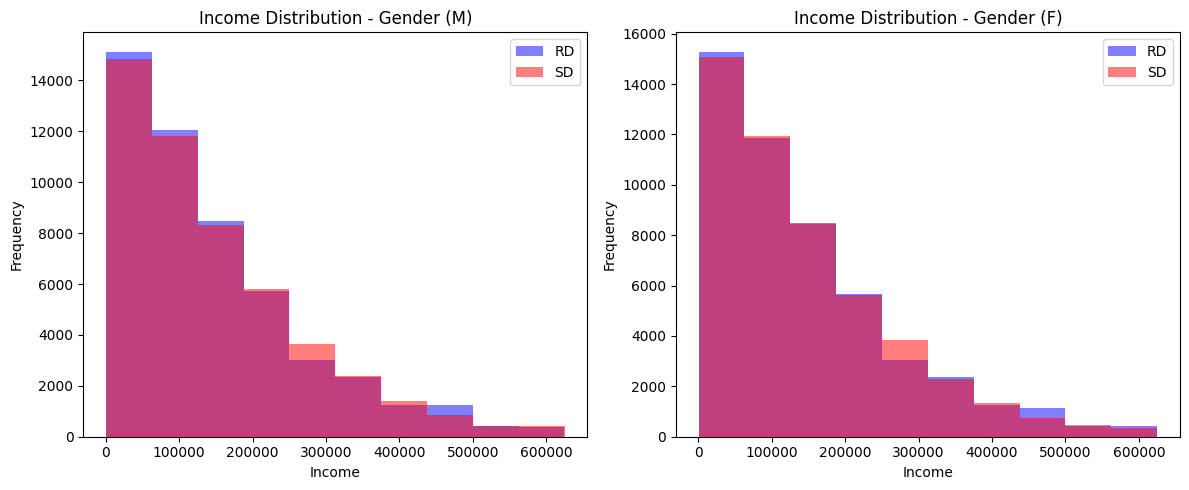

In [11]:
# Filter data for gender 'M'
RD_gender_M = RD[RD['Gender'] == 'M']
SD_gender_M = SD[SD['Gender'] == 'M']

# Filter data for gender 'F'
RD_gender_F = RD[RD['Gender'] == 'F']
SD_gender_F = SD[SD['Gender'] == 'F']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram of income for gender 'M' in RD and SD
ax1.hist(RD_gender_M['Income'], bins=10, color='blue', alpha=0.5, label='RD')
ax1.hist(SD_gender_M['Income'], bins=10, color='red', alpha=0.5, label='SD')

# Plot histogram of income for gender 'F' in RD and SD
ax2.hist(RD_gender_F['Income'], bins=10, color='blue', alpha=0.5, label='RD')
ax2.hist(SD_gender_F['Income'], bins=10, color='red', alpha=0.5, label='SD')

# Set labels and title for subplots
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')
ax1.set_title('Income Distribution - Gender (M)')
ax2.set_xlabel('Income')
ax2.set_ylabel('Frequency')
ax2.set_title('Income Distribution - Gender (F)')

# Add legend to each subplot
ax1.legend()
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Age Range VS Income 

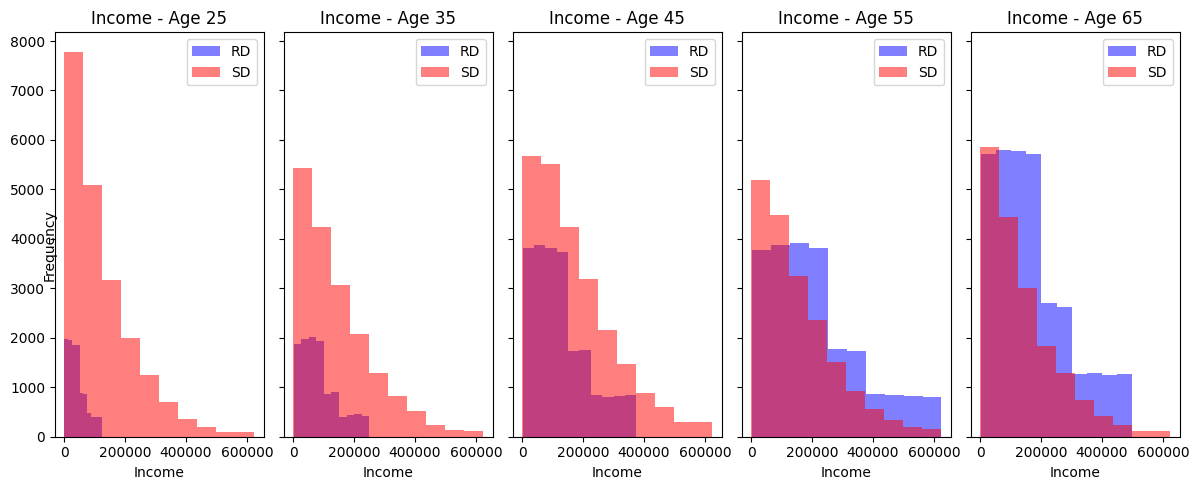

In [12]:
# Get unique Age Range values
age_ranges = sorted(RD['Age Range'].unique())

# Create subplots
fig, axs = plt.subplots(1, len(age_ranges), figsize=(12, 5), sharey=True)

# Iterate over each Age Range
for i, age_range in enumerate(age_ranges):
    # Filter data for current Age Range in RD and SD
    RD_age_range = RD[RD['Age Range'] == age_range]['Income']
    SD_age_range = SD[SD['Age Range'] == age_range]['Income']

    # Plot histogram of Income for current Age Range in RD and SD
    axs[i].hist(RD_age_range, bins=10, color='blue', alpha=0.5, label='RD')
    axs[i].hist(SD_age_range, bins=10, color='red', alpha=0.5, label='SD')

    # Set labels and title for each subplot
    axs[i].set_xlabel('Income')
    axs[i].set_title(f'Income - Age {age_range}')

    # Add legend to each subplot
    axs[i].legend()

# Set common y-label
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Region VS Income 

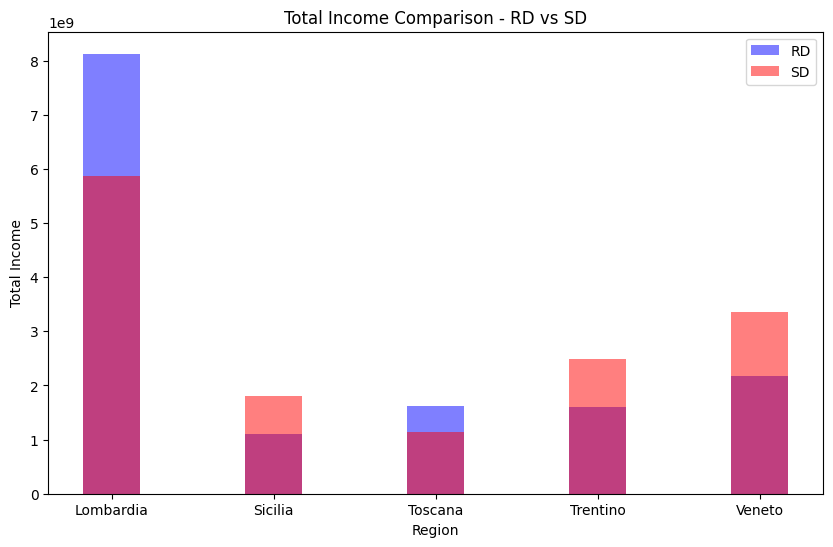

In [13]:
# Get unique regions
regions = np.unique(RD['Region'])

# Get the number of regions
num_regions = len(regions)

# Set the width of each bar
bar_width = 0.35

# Set the spacing between bars
spacing = 0.2

# Calculate the center positions of the bars
bar_positions = np.arange(num_regions)

# Calculate the total income for each region in RD and SD
RD_total_income = RD.groupby('Region')['Income'].sum()
SD_total_income = SD.groupby('Region')['Income'].sum()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RD total income by region
ax.bar(bar_positions, RD_total_income, width=bar_width, color='blue', alpha=0.5, label='RD')

# Plot SD total income by region, overlapping RD bars
ax.bar(bar_positions, SD_total_income, width=bar_width, color='red', alpha=0.5, label='SD')

# Set x-axis tick positions and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(regions)

# Set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Total Income')
ax.set_title('Total Income Comparison - RD vs SD')

# Add legend
ax.legend()

# Show the plot
plt.show()
